In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat
import pandas as pd
import copy
import gzip

In [77]:
WN = np.loadtxt('W_avg.csv')
Cave = np.loadtxt('Cave.csv')
pop = np.loadtxt('pop_new.csv')

In [78]:
num_fips = len(pop)
T = 60
#initialize variables
# seeding
l0 = 1859-1 # start with New York County NY in python -1, in matlab is 1859

In [7]:
num_fips

3142

In [79]:
import numpy as np
import gzip

def load_gzipped_numpy(filename):
    with gzip.open(filename, 'rb') as f:
        return np.load(f, allow_pickle=True)

In [80]:
R0 = 2.5
rs = np.array([20, 10., 2.0, 1.0, 0.5, 0.2, 0.1, 0.05, 0.025])
# rs = np.array([0.1])
export_dir = '/Volumes/Seagate_Qing/Branching/Simulation/'
E_mean_county = np.zeros((9,60))
E_std_county = np.zeros((9,60))
for r_idx in range(9):
    r = rs[r_idx]
    print(r)
    sub_export_dir = export_dir+'branching_R0-{}_r-{}/'.format(np.round(R0,2),np.round(r,3))
    En_NewInf = np.zeros((300,num_fips,T))
    for i in range(300):
        export_names = sub_export_dir+'NewInf_R0-{}_r-{}_{}.npy.gz'.format(np.round(R0,2),np.round(r,3),(i+1))
        En_NewInf[i,:,:] = load_gzipped_numpy(export_names)  
    ### select the ensembles in which the dieases does not die out
    E_daily_per_pop = En_NewInf[:,:,:]/pop[None,:,None]*100000
    num_county = np.sum(E_daily_per_pop[:,:,:60]>10,axis=1)
    E_mean_county[r_idx] = np.mean(num_county,axis=0)
    E_std_county[r_idx] = np.std(num_county,axis=0)

20.0
10.0
2.0
1.0
0.5
0.2
0.1
0.05
0.025


In [81]:
NewInf_ode = np.loadtxt('metapop_R025.csv')
infec_perpop = NewInf_ode/pop[:,None]*100000
county_ode = np.sum(infec_perpop>10,axis=0)

(0.0, 60.0)

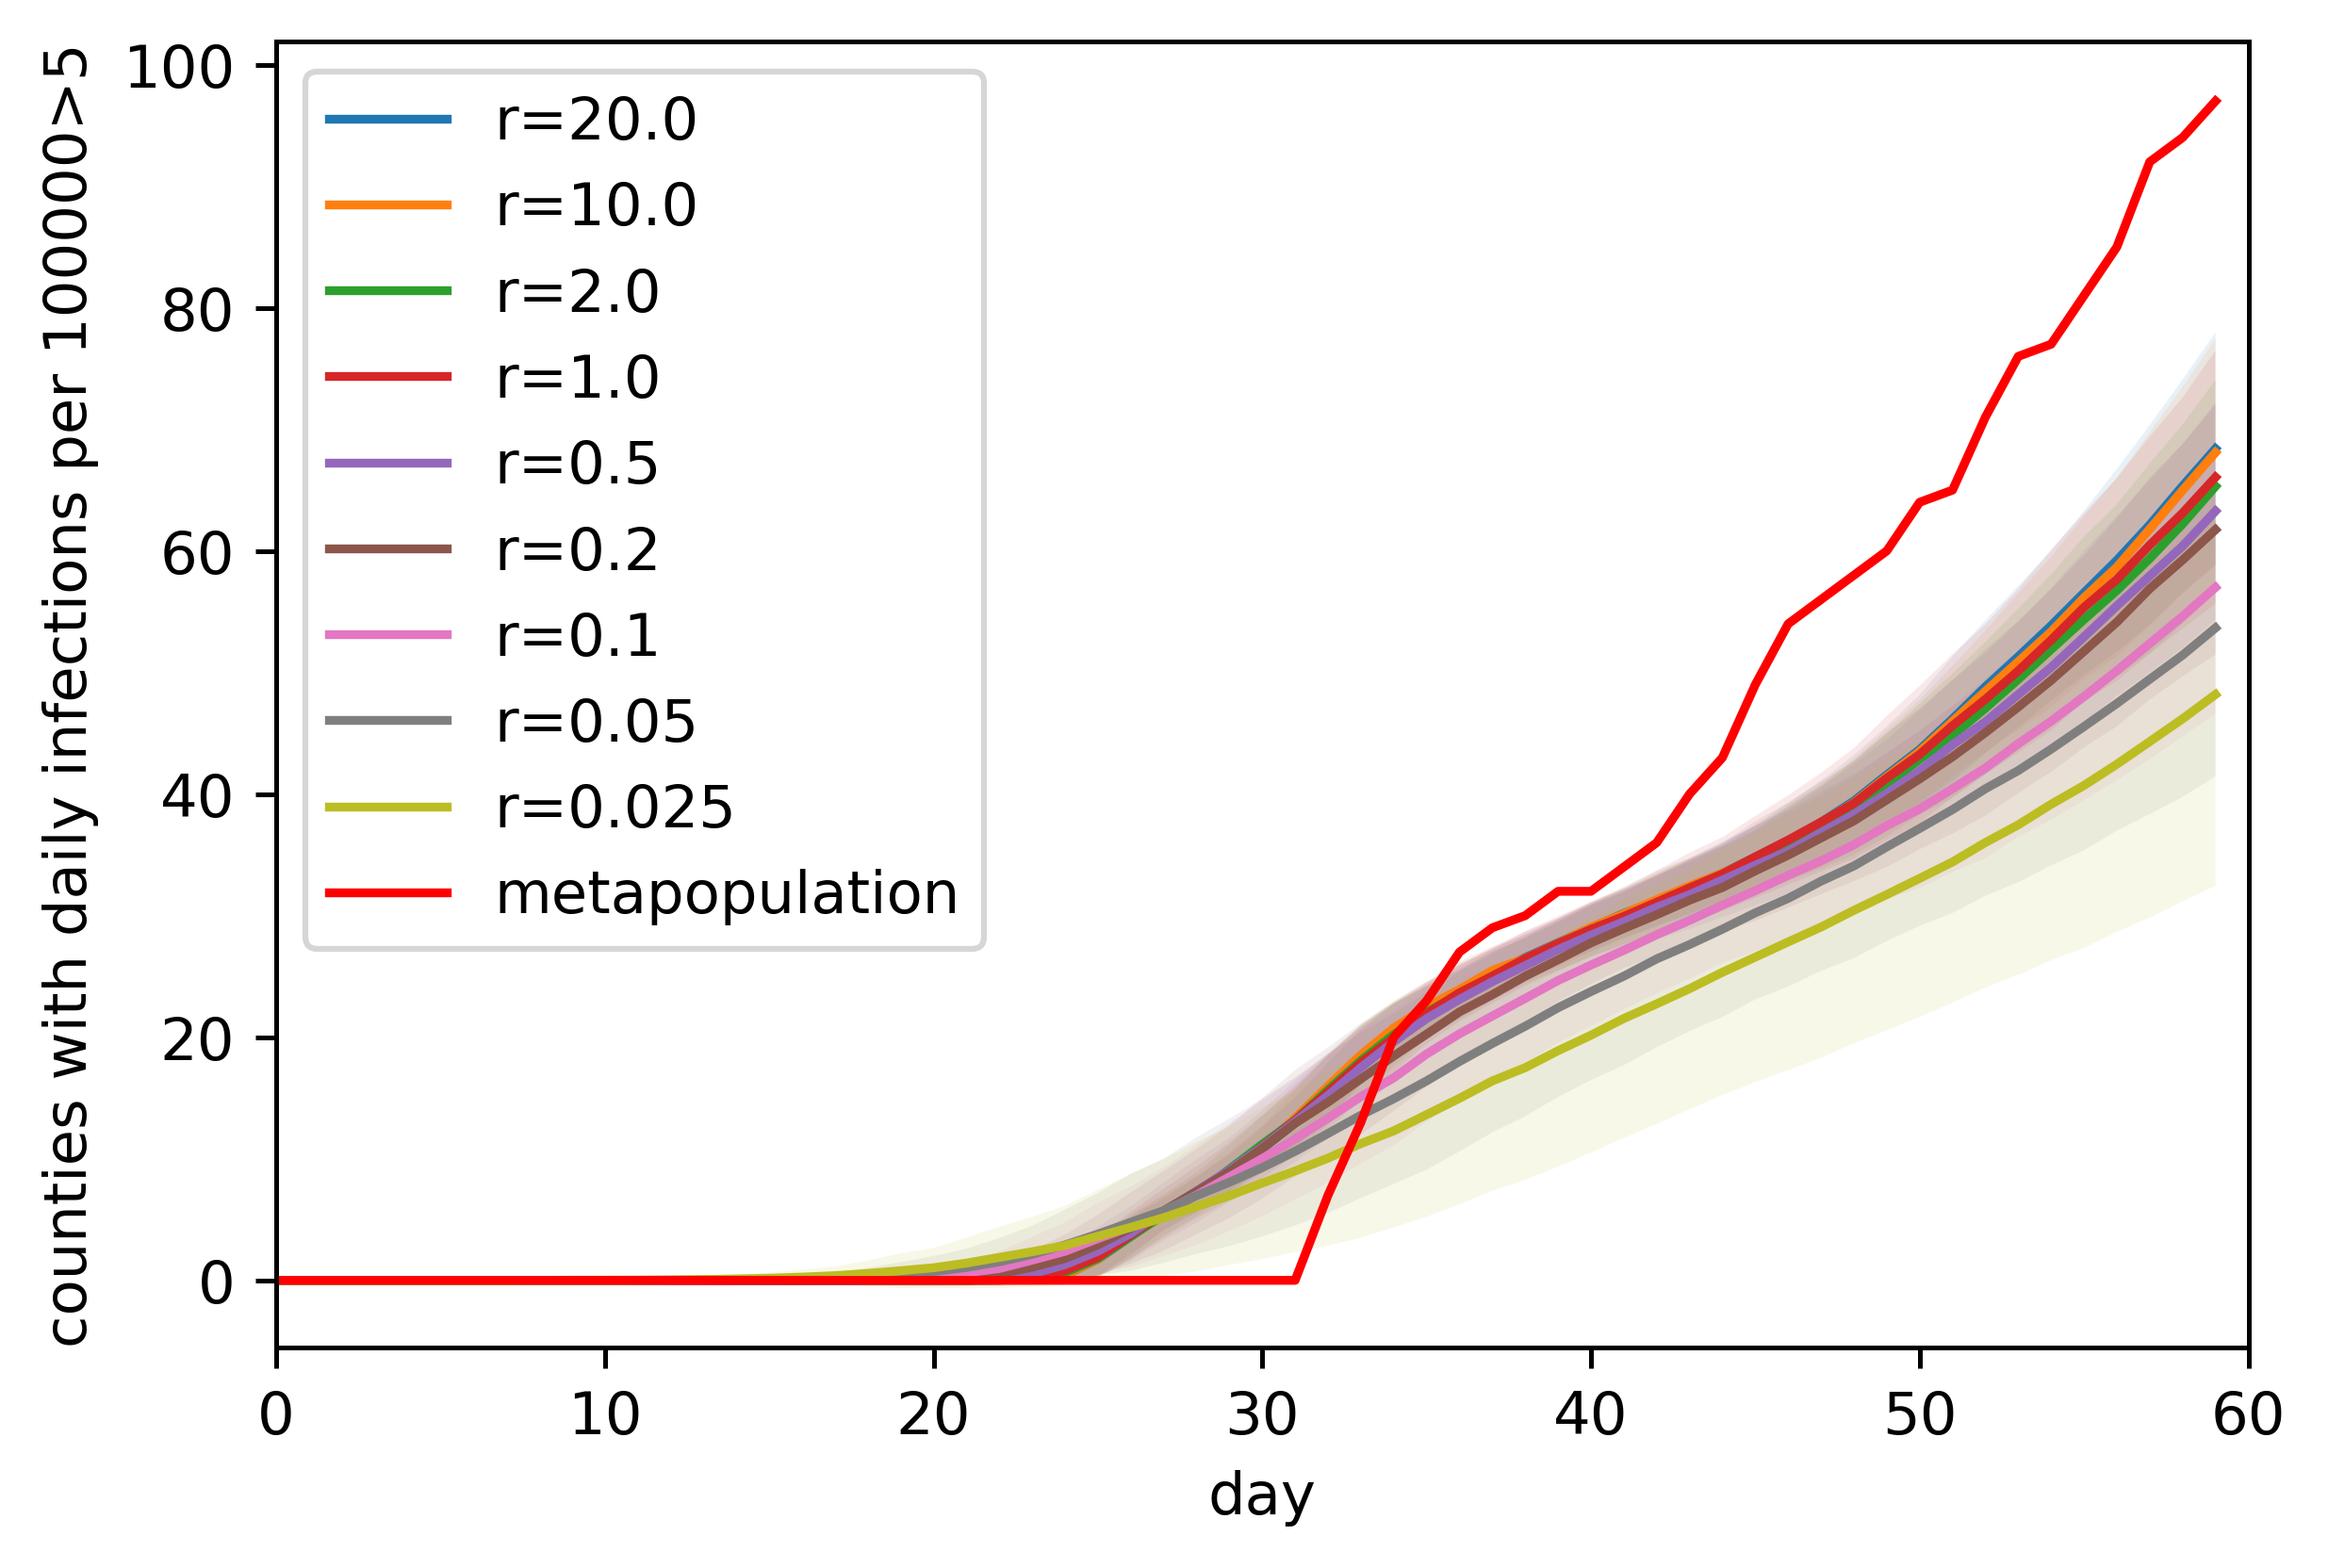

In [82]:
plt.figure(dpi=450,figsize=(6,4))
for r_idx in range(9):
    r = rs[r_idx]
    mean_county1 =  E_mean_county[r_idx]
    std_county1 = E_std_county[r_idx]
    plt.plot(mean_county1,label='r={}'.format(r))
    plt.fill_between(range(60),mean_county1-std_county1,mean_county1 +std_county1,alpha=0.1)


plt.plot(county_ode,label='metapopulation',color='red')

plt.legend()
plt.xlabel('day')
plt.ylabel('counties with daily infections per 100000>5')
plt.xlim(0,60)
# plt.ylim(-1,40)

In [28]:
save_dir = '../../../../../../Volumes/My Passport/branching/branching_results500/'
R0 = 2.1
rs = np.arange(0.01, 1, 0.02)
rs_selected = [0,1,2,3,4,5,6,25,49] ### select some r values
rs = rs[rs_selected]

E_mean_county = np.zeros((9,60))
E_std_county = np.zeros((9,60))

for r_idx in range(9):
    print(r_idx)
    r_i = rs[r_idx]
    file_name1 = save_dir + "NewInf_R0-{}_r-{}.npy.gz" .format(np.round(R0,2),np.round(r_i,2))
    f1 = gzip.GzipFile(file_name1, "r")
    En_NewInf =  np.load(f1)
    valid_en = np.unique(np.where(En_NewInf[:,:,59]>1)[0])
    E_NewInf = En_NewInf[valid_en,:,:]
    E_daily_per_pop = E_NewInf[:,:,:60]/pop[None,:,None]*100000
    num_county = np.sum(E_daily_per_pop[:,:,:60]>5,axis=1)
    E_mean_county[r_idx] = np.mean(num_county,axis=0)
    E_std_county[r_idx] = np.std(num_county,axis=0)

0
1
2
3
4
5
6
7
8


In [25]:
NewInf_ode = np.loadtxt('metapop_R021.csv')

In [26]:
infec_perpop = NewInf_ode/pop[:,None]*100000
county_ode = np.sum(infec_perpop>5,axis=0)

(0.0, 60.0)

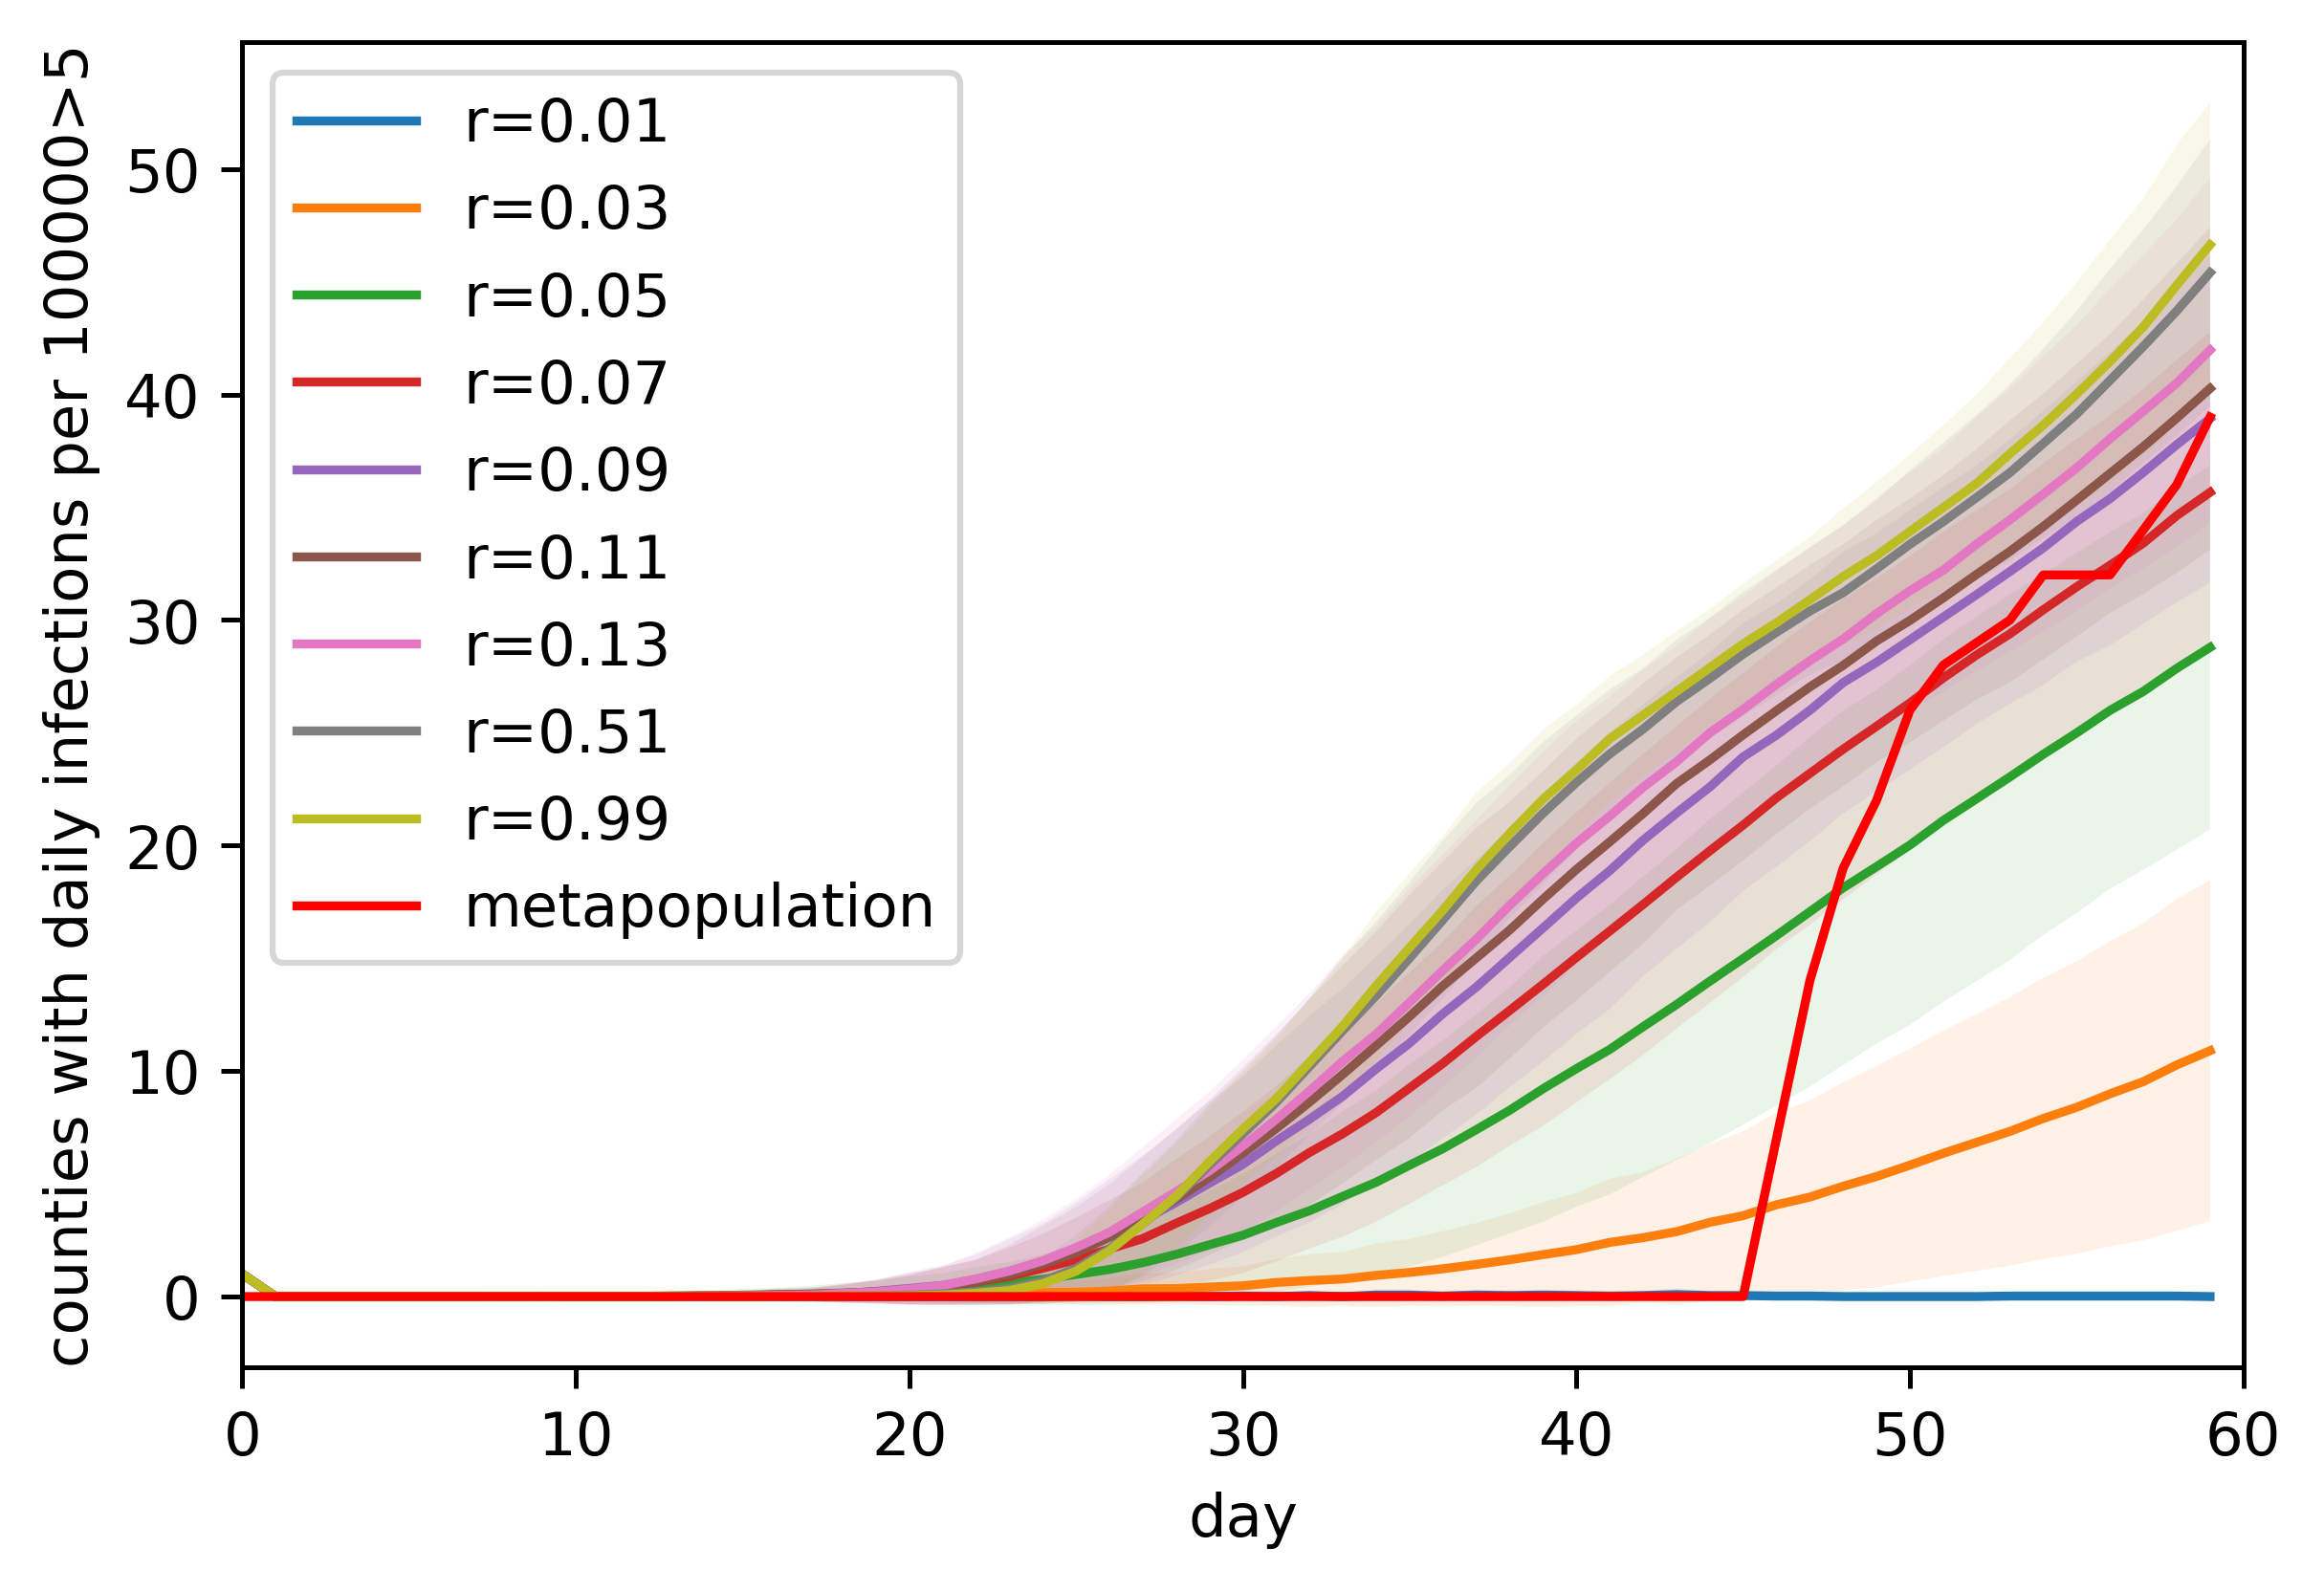

In [29]:
plt.figure(dpi=450,figsize=(6,4))
for r_idx in range(9):
    r = rs[r_idx]
    mean_county1 =  E_mean_county[r_idx]
    std_county1 = E_std_county[r_idx]
    plt.plot(mean_county1,label='r={}'.format(np.round(r,2)))
    plt.fill_between(range(60),mean_county1-std_county1,mean_county1 +std_county1,alpha=0.1)


plt.plot(county_ode,label='metapopulation',color='red')

plt.legend()
plt.xlabel('day')
plt.ylabel('counties with daily infections per 100000>5')
plt.xlim(0,60)
# plt.ylim(-1,40)